In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle_mall as w
from pydataset import data
from env import get_connection
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
df = data('iris')
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
# clean up the column names:
df.columns = [
    col.lower().replace('.','_') for col in df.columns
]

In [4]:
numerical = ['sepal_length', 'sepal_width']
categorical = ['species']
feats = numerical

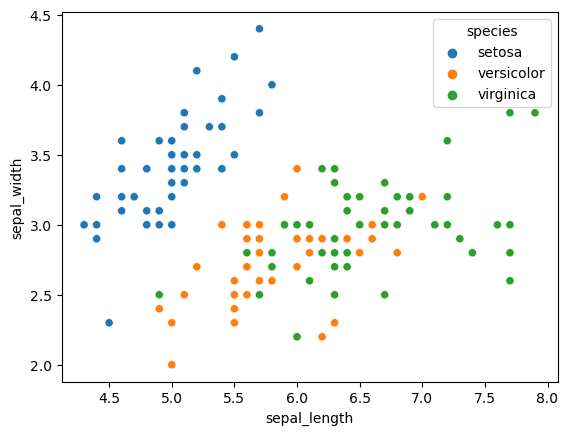

In [5]:
sns.scatterplot(data=df, x='sepal_length', y='sepal_width', hue = 'species')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5, n_init='auto')

In [7]:
kmeans.fit(df[feats])

KMeans(n_clusters=5, n_init='auto')

In [8]:
df['sk_clusters'] = kmeans.predict(df[feats])

In [9]:
kmeans.inertia_

26.152818409297677

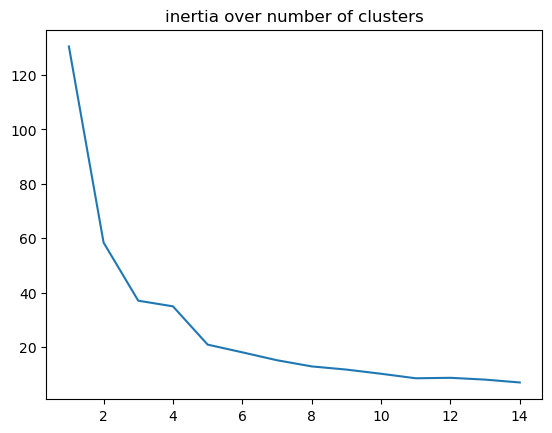

In [10]:
pd.Series(
    {i: 
 KMeans(n_clusters=i, n_init='auto').fit(df[feats]).inertia_
 for i in range(1,15)
}).plot().set(title='inertia over number of clusters');

In [11]:
df[df.sk_clusters == 2 ].species.value_counts()

versicolor    24
virginica      6
setosa         1
Name: species, dtype: int64

NameError: name 'train' is not defined

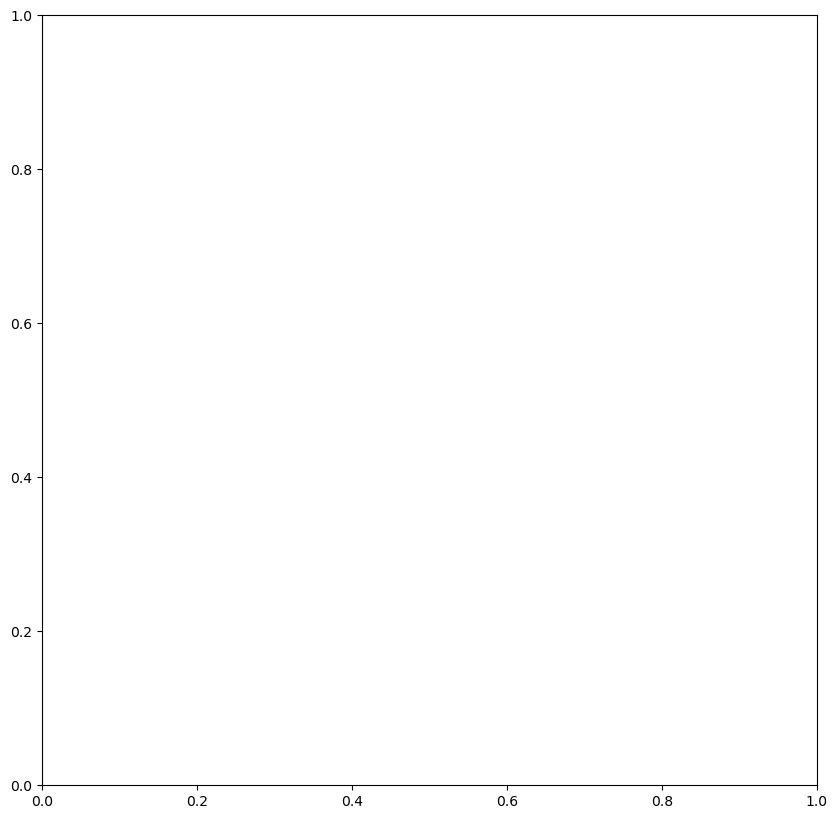

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
for cluster, subset in train[feats_with_cluster].groupby(
    'sk_clusters'):
    ax.scatter(subset['sepal_length'], subset['sepal_width'], label=cluster)
for i in centroid.keys():
    # unpack the dimensions associated with the data point in the dictionary
    ax.plot(*centroid[i], marker='X', c='black')
plt.show()

---

In [14]:
train, val, test = w.wrangle_mall()
train.head()

Shape of Data: 
(200, 5)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
Descriptions:
|                |   count |   mean |     std |   min |   25% |   50% |    75% |   max |
|:---------------|--------:|-------:|--------:|------:|------:|------:|-------:|------:|
| customer_id    |     200 | 100.5  | 57.8792 |     1 | 50.75 | 100.5 | 150.25 |   200 |
| age            |     200 |  38.85 | 13.969  |    18 | 28.75 |  36   |  49    |    70 |
| annual_income  |     200 |  60.56 | 26.2647 |    15 | 41.5  |  61.5 |  78    |   137 |
| spending_score |     200 |  50.2  | 25.8

,gender,age,annual_income,spending_score,age_scaled,annual_income_scaled,spending_score_scaled,is_male
customer_id,,,,,,,,
27,Female,45,28,32,0.519231,0.106557,0.294737,0
24,Male,31,25,73,0.250000,0.081967,0.726316,1
40,Female,20,37,75,0.038462,0.180328,0.747368,0
38,Female,30,34,73,0.230769,0.155738,0.726316,0
57,Female,51,44,50,0.634615,0.237705,0.484211,0


In [39]:
kmeans = KMeans(n_clusters=6, n_init='auto')

In [40]:
feats = ['spending_score', 'annual_income']

In [41]:
kmeans.fit(train[feats])

KMeans(n_clusters=6, n_init='auto')

In [42]:
# use the thing:
train['sk_clusters'] = kmeans.predict(train[feats])

In [43]:
kmeans.inertia_

20970.624480021892

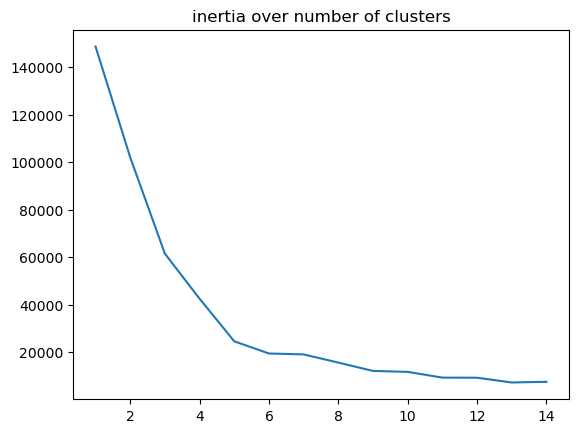

In [44]:
pd.Series(
    {i: 
 KMeans(n_clusters=i, n_init='auto').fit(train[feats]).inertia_
 for i in range(1,15)
}).plot().set(title='inertia over number of clusters');